In [1]:
import wikipedia
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Download necessary NLTK data (only once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kengu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kengu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kengu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Define Preprocessing Function

In [3]:
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove escape sequences and control characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = re.sub(r'\\[a-zA-Z0-9]+', '', text)  # Remove things like \n, \t, etc.
    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Filter: remove stopwords, numbers, and short tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stopwords.words('english') and len(word) > 2 and not word.isnumeric()
    ]
    return ' '.join(tokens)


1.	(20 points) Using Wikipedia as the corpus, obtain 5 different topics that will serve as your documents, and create a term-document matrix. You can use the shared code on GitHub as a reference.
a.	Term-document matrix using raw frequency.
b.	Term-document matrix using TF-IDF weights.


In [4]:
# Step 1: Define topics to search on Wikipedia
topics = ["Artificial intelligence", "Climate change", "World War II", "Quantum computing", "Cryptography"]


In [5]:
# Step 2: Fetch Wikipedia summaries (or full content)
documents = [wikipedia.page(topic).content for topic in topics]

In [6]:
# Step 3a: Term-document matrix using raw frequency (CountVectorizer)
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(documents)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out(), index=topics) 

In [7]:
# Step 3b: Term-document matrix using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=topics)

a.	Term-document matrix using raw frequency.

In [8]:
# Display output
print("\n🔢 Term-Document Matrix (Raw Frequency):")
print(count_df.iloc[:, :10])  # Show only first 10 terms for brevity


🔢 Term-Document Matrix (Raw Frequency):
                         00  000  01  024  048  05  052  06  0700  10
Artificial intelligence   0    2   0    0    0   0    0   0     1   2
Climate change            0    4   0    0    0   1    0   1     0   7
World War II              0   48   0    0    0   0    1   0     0  11
Quantum computing         9    2   8    1    1   0    0   0     0  14
Cryptography              0    0   0    0    0   0    0   0     0   0


b.	Term-document matrix using TF-IDF weights.

In [9]:
print("\n📊 Term-Document Matrix (TF-IDF):")
print(tfidf_df.iloc[:, :10])  # Show only first 10 terms for brevity


📊 Term-Document Matrix (TF-IDF):
                              00       000        01       024       048  \
Artificial intelligence  0.00000  0.004225  0.000000  0.000000  0.000000   
Climate change           0.00000  0.008718  0.000000  0.000000  0.000000   
World War II             0.00000  0.097239  0.000000  0.000000  0.000000   
Quantum computing        0.03173  0.003972  0.028204  0.003526  0.003526   
Cryptography             0.00000  0.000000  0.000000  0.000000  0.000000   

                               05       052        06     0700        10  
Artificial intelligence  0.000000  0.000000  0.000000  0.00375  0.004225  
Climate change           0.003868  0.000000  0.003868  0.00000  0.015256  
World War II             0.000000  0.003596  0.000000  0.00000  0.022284  
Quantum computing        0.000000  0.000000  0.000000  0.00000  0.027807  
Cryptography             0.000000  0.000000  0.000000  0.00000  0.000000  


In [10]:
preprocessed_docs = [preprocess(doc) for doc in documents]
tokenized_docs = [doc.split() for doc in preprocessed_docs]

3.	(10 points) Using cosine similarity, compare two documents and find out which of the documents is most similar.

C:\Users\kengu\AppData\Local\Temp\ipykernel_5656\4181614916.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kengu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


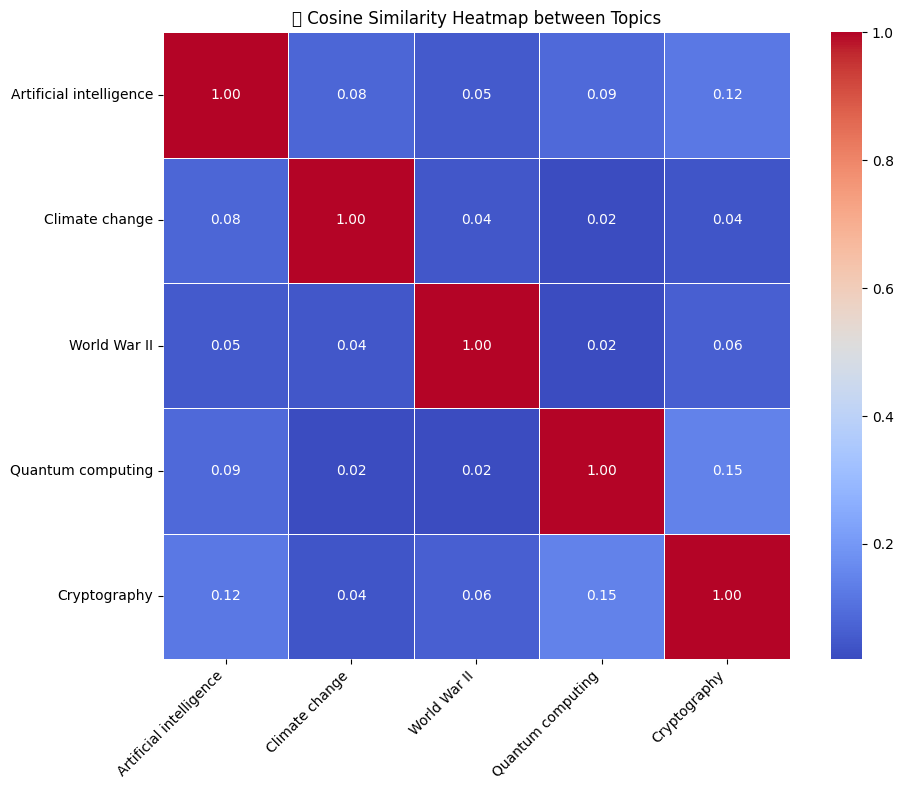


🔍 Most similar documents: Quantum computing and Cryptography with similarity score of 0.1454


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Step 4: Compute cosine similarity matrix from TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim, index=topics, columns=topics)

# 📐 Display Cosine Similarity Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("🔍 Cosine Similarity Heatmap between Topics")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Find the most similar pair of documents (excluding self-comparisons)
most_similar_score = -1
most_similar_pair = None

for i in range(len(topics)):
    for j in range(len(topics)):
        if i != j and cosine_sim[i][j] > most_similar_score:
            most_similar_score = cosine_sim[i][j]
            most_similar_pair = (topics[i], topics[j])

print(f"\n🔍 Most similar documents: {most_similar_pair[0]} and {most_similar_pair[1]} with similarity score of {most_similar_score:.4f}")


In [12]:
print("Preprocessed Text (All Documents):")
for idx, doc in enumerate(preprocessed_docs):  # Fixed: removed .values()
    print(f"Document {idx+1}: {doc}\n")

Preprocessed Text (All Documents):
Document 1: artificial intelligence refers capability computational system perform task typically associated human intelligence learning reasoning problemsolving perception decisionmaking field research computer science develops study method software enable machine perceive environment use learning intelligence take action maximize chance achieving defined goal machine may called ai highprofile application include advanced web search engine google search recommendation system used youtube amazon netflix virtual assistant google assistant siri alexa autonomous vehicle waymo generative creative tool chatgpt art superhuman play analysis strategy game chess however many application perceived lot cutting edge filtered general application often without called something becomes useful enough common enough labeled anymore various subfields research centered around particular goal use particular tool traditional goal research include learning reasoning knowled

4.	(30 points) Using the same dataset used above, use the word2vec package to create a classifier for dense vectors.
a.	Use Logistic Regression, with the appropriate configuration for the model and dataset.


In [13]:
from gensim.models import Word2Vec

# Train Word2Vec model on the preprocessed tokenized documents
w2v_model = Word2Vec(
    sentences=tokenized_docs,  # Fixed: removed .values() if tokenized_docs is a list
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

# Save the model for future use
w2v_model.save("word2vec.model")

In [ ]:
import numpy as np

def get_doc_vector(doc_tokens):
    # Create a vector for the document by averaging word vectors
    vectors = [w2v_model.wv[word] for word in doc_tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

# Create document vectors for each document
X = np.array([get_doc_vector(tokens) for tokens in tokenized_docs]) 

In [25]:
from sklearn.preprocessing import LabelEncoder

# Dummy labels for illustration (replace with your actual labels)
y_labels = ['tech', 'environment', 'history', 'tech', 'tech']

# Encode labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets (e.g., 60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [27]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    labels=np.unique(y)
))

              precision    recall  f1-score   support

 environment       0.00      0.00      0.00         1
     history       0.00      0.00      0.00         0
        tech       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.17      0.33      0.22         2
weighted avg       0.25      0.50      0.33         2



c:\Users\kengu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kengu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kengu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

The classification report shows that the model performed poorly due to a very small test set of only 2 samples, with only one correctly predicted class (tech). The model struggled with the environment class, and history had no examples in the test set, making its performance evaluation impossible. Overall, the model achieved 50% accuracy, but it needs more data and balanced classes to provide meaningful results.